In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

/Users/mturilli/Virtualenvs/RP-PAPER-IPDPS18/lib/python2.7/site-packages/radical/utils/atfork/stdlib_fixer.py:63: UserWarning: logging module already imported before fixup.
  warnings.warn('logging module already imported before fixup.')


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
test_sessions = pd.read_csv('data/tests/sessions.csv', index_col=0)
test_pilots = pd.read_csv('data/tests/pilots.csv', index_col=0)
test_units = pd.read_csv('data/tests/units.csv', index_col=0)

In [3]:
print 'Tests: Total number of successful runs: %s' % test_sessions.shape[0]
print 'Tests: Total number of pilots: %s' % test_pilots.shape[0]
print 'Tests: Total number of units: %s\n' % test_units.shape[0]

Tests: Total number of successful runs: 1
Tests: Total number of pilots: 1
Tests: Total number of units: 1024



# Synapse

## Tests

In [4]:
# Load sessions for Synapse experiment 1
test_sras = load_sessions('/Users/mturilli/Projects/RADICAL/github/experiments/rp-paper-ipdps2018/analysis/data/tests', 
                        test_sessions, 
                        sorted(test_sessions.nunit.unique().tolist()))

Text(0,0.5,u'Number of Units')

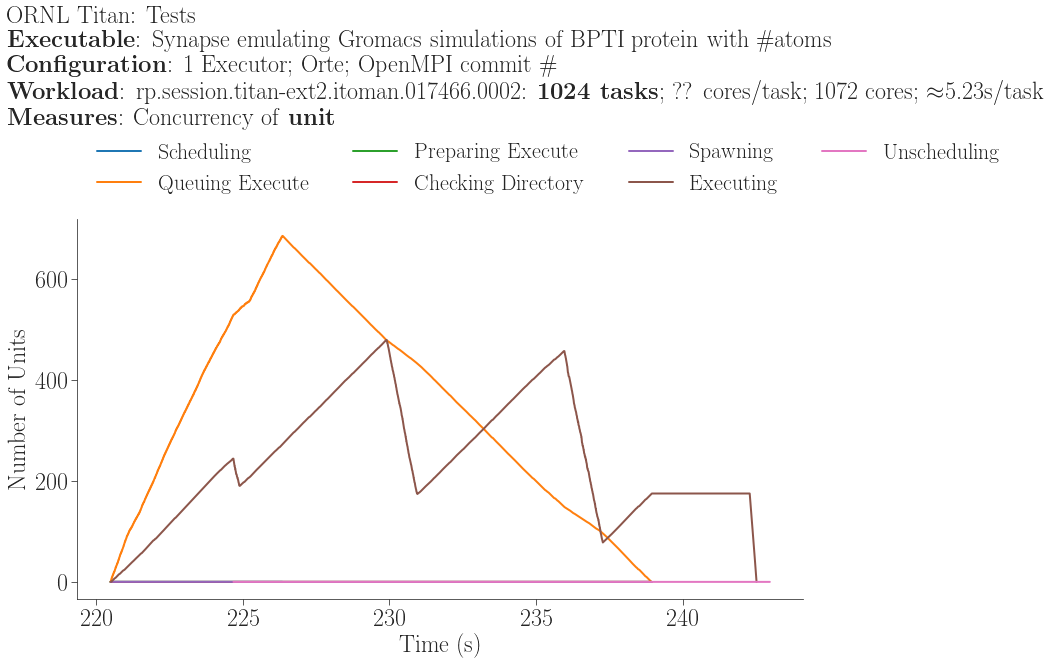

In [5]:
fig, ax  = fig_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$%.2fs/task' % (sid, snunit, sncore, muetime)
title_desc = '\\textbf{Measures}: Concurrency of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.05, y=1.3, horizontalalignment='left')

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_start'}])                # Preparing Execution stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being held while their directories are being created
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'exec_mkdir'},                 # Creating Directory start
 {ru.STATE: None, ru.EVENT: 'exec_mkdir_done'}])           # Creating Directory stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[14])

# How many units are being spawned
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'exec_start'},                 # Spawning start 
 {ru.STATE: None, ru.EVENT: 'exec_ok'}])                   # Spawned
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'exec_ok'},                    # Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Executed
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},           # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])           # Unscheduling stop
x = [item[0] for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

ax.legend(ncol=4, loc='upper left', bbox_to_anchor=(0,1.25),
          labels=['Scheduling', 'Queuing Execute', 'Preparing Execute', 
                  'Checking Directory', 'Spawning', 'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

Text(0,0.5,u'Time (s)')

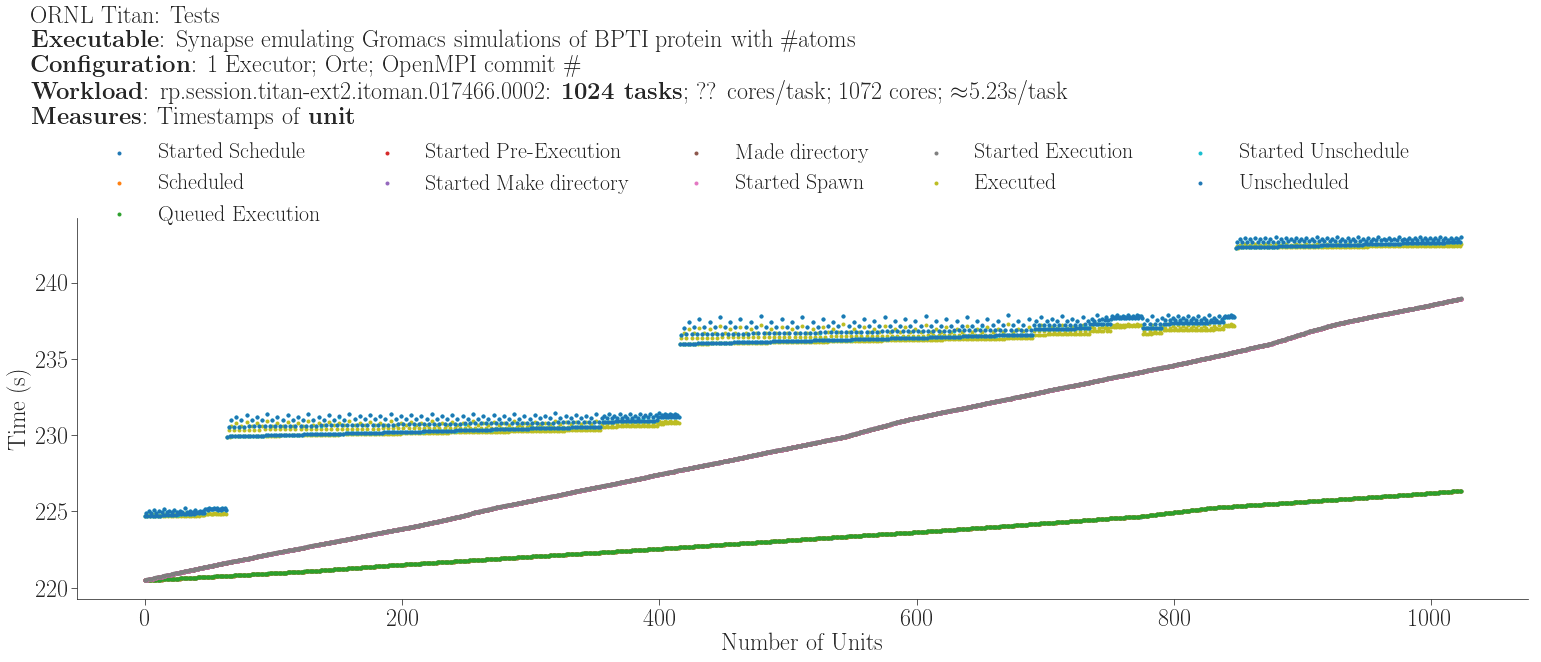

In [6]:
fig, ax  = fig_hdouble_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$%.2fs/task' % (sid, snunit, sncore, muetime)
title_desc = '\\textbf{Measures}: Timestamps of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.1, y=1.3, horizontalalignment='left')


# Get events and order them by Scheduling
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduled')
df = df.reset_index(drop=True)

plt.scatter(df['Started Schedule'].index      , df['Started Schedule']      , marker='.')
plt.scatter(df['Scheduled'].index             , df['Scheduled']             , marker='.')
plt.scatter(df['Queued Execution'].index      , df['Queued Execution']      , marker='.')
plt.scatter(df['Started Pre-Execution'].index , df['Started Pre-Execution'] , marker='.')
plt.scatter(df['Started Make directory'].index, df['Started Make directory'], marker='.')
plt.scatter(df['Made directory'].index        , df['Made directory']        , marker='.')
plt.scatter(df['Started Spawn'].index         , df['Started Spawn']         , marker='.')
plt.scatter(df['Started Execution'].index     , df['Started Execution']     , marker='.')
plt.scatter(df['Executed'].index              , df['Executed']              , marker='.')
plt.scatter(df['Started Unschedule'].index    , df['Started Unschedule']    , marker='.')
plt.scatter(df['Unscheduled'].index           , df['Unscheduled']           , marker='.')

plt.legend(ncol=5, loc='upper left', bbox_to_anchor=(0,1.25))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

Text(0,0.5,u'Time (s)')

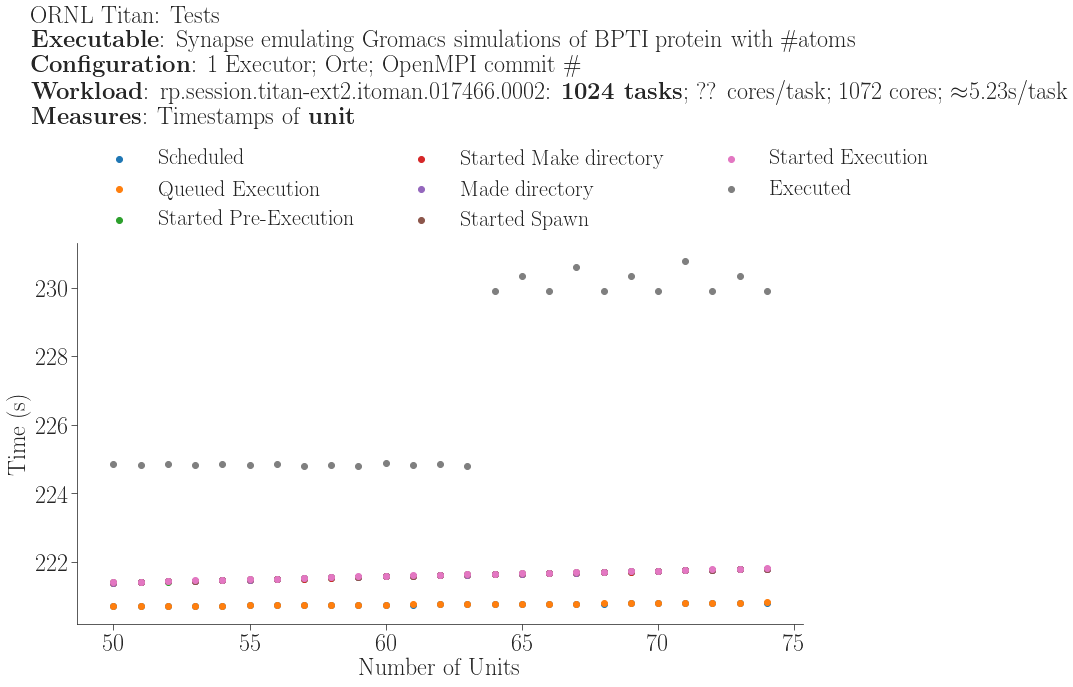

In [7]:
fig, ax = fig_setup()
sessions = test_sessions
units    = test_units
session  = test_sras[1024][0]
sid      = session._sid
snunit   = test_sessions.loc[session._sid].nunit
sncore   = test_sessions.loc[session._sid].ncore
muetime  = (units.AGENT_STAGING_OUTPUT_PENDING - units.AGENT_EXECUTING).mean()

title_head = 'ORNL Titan: Tests'
title_exec = '\\textbf{Executable}: Synapse emulating Gromacs simulations of BPTI protein with \#atoms'
title_conf = '\\textbf{Configuration}: 1 Executor; Orte; OpenMPI commit \#'
title_work = '\\textbf{Workload}: %s: \\textbf{%s tasks}; ?? cores/task; %s cores; $\\approx$%.2fs/task' % (sid, snunit, sncore, muetime)
title_desc = '\\textbf{Measures}: Timestamps of \\textbf{unit}'
title = '%s\n%s\n%s\n%s\n%s' % (title_head, title_exec, title_conf, title_work, title_desc)
fig.suptitle(title, x=0.075, y=1.35, horizontalalignment='left')

df = get_df_unit_events(session)
df = df.sort_values(by='Scheduled')
df = df.reset_index(drop=True)
df = df.iloc[50:75]

# plt.scatter(df['Started Schedule'].index     , df['Started Schedule'])
plt.scatter(df['Scheduled'].index             , df['Scheduled'])
plt.scatter(df['Queued Execution'].index     , df['Queued Execution'])
plt.scatter(df['Started Pre-Execution'].index , df['Started Pre-Execution'])
plt.scatter(df['Started Make directory'].index, df['Started Make directory'])
plt.scatter(df['Made directory'].index        , df['Made directory'])
plt.scatter(df['Started Spawn'].index         , df['Started Spawn'])
plt.scatter(df['Started Execution'].index    , df['Started Execution'])
plt.scatter(df['Executed'].index             , df['Executed'])
# plt.scatter(df['Started Unschedule'].index   , df['Started Unschedule'])
# plt.scatter(df['Unscheduled'].index          , df['Unscheduled'])

plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.3))
plt.xlabel('Number of Units')
plt.ylabel('Time (s)')

# plt.savefig('figures/titan_unit_events_2048_b.pdf', dpi=600, bbox_inches='tight')

In [8]:
session = test_sras[1024][0]
df = get_df_unit_events(session)
df = df.sort_values(by='Scheduled')
df = df.reset_index(drop=True)
df.iloc[63:65][[
    'uid', 
#   'Started Schedule',
#   'Scheduled',
    'Queuing Execution',
    'Preparing Execution',
#    'Queued Execution',
    'Making directory',
    'Spawning',
    'Executing',
    'Unscheduling'
#   'Started Pre-Execution',
#   'Started Make directory',
#   'Made directory',
#   'Started Spawning',
#   'Started Execution',
#   'Executed',
#   'Started Unschedule',
#   'Unscheduled'
    ]]

,uid,Queuing Execution,Preparing Execution,Making directory,Spawning,Executing,Unscheduling
63,unit.000157,0.8590,0.0146,0.0008,0.0072,3.1693,0.0011
64,unit.000062,0.8709,0.0140,0.0007,0.0069,8.2416,0.0016
